## **INTRODUCTION**

Twitter Airline Reviews Sentiment Analysis - 
This dataset contains reviews of different airlines as tweets. The sentiments of the reviews provided are categorised as positive, negative and neutral. The dataset contains more than 500K reviews.


### **Exploratory Data Analysis(EDA)**

Visualization of a dataset provides better understanding of the dataset. To do so, lets import the necessary libraries required.

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [0]:
data = pd.read_csv('/content/drive/My Drive/Twitter Airline Reviews Sentiment Dataset/Airline_Reviews_Sentinment_Tweets.csv', parse_dates=['tweet_created'])

In [0]:
data

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52-08:00,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59-08:00,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01-08:00,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46-08:00,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15-08:00,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02-08:00,New Jersey,Eastern Time (US & Canada)


Checking for any nan values in the columns

In [0]:
data.isnull().sum()

tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

Percentage of nan values in each column is shown.

In [0]:
((len(data)-data.count())/len(data))*100

tweet_id                         0.000000
airline_sentiment                0.000000
airline_sentiment_confidence     0.000000
negativereason                  37.308743
negativereason_confidence       28.128415
airline                          0.000000
airline_sentiment_gold          99.726776
name                             0.000000
negativereason_gold             99.781421
retweet_count                    0.000000
text                             0.000000
tweet_coord                     93.039617
tweet_created                    0.000000
tweet_location                  32.329235
user_timezone                   32.923497
dtype: float64

By looking at the above percentages of nan values, the columns with higher percentage of nan values are dropped

In [0]:
df=data.drop(['airline_sentiment_gold', 'negativereason_gold', 'tweet_coord'], axis=1)

In [0]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,name,retweet_count,text,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,cairdin,0,@VirginAmerica What @dhepburn said.,2015-02-24 11:35:52-08:00,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,jnardino,0,@VirginAmerica plus you've added commercials t...,2015-02-24 11:15:59-08:00,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,yvonnalynn,0,@VirginAmerica I didn't today... Must mean I n...,2015-02-24 11:15:48-08:00,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,jnardino,0,@VirginAmerica it's really aggressive to blast...,2015-02-24 11:15:36-08:00,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,jnardino,0,@VirginAmerica and it's a really big bad thing...,2015-02-24 11:14:45-08:00,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,KristenReenders,0,@AmericanAir thank you we got on a different f...,2015-02-22 12:01:01-08:00,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,itsropes,0,@AmericanAir leaving over 20 minutes Late Flig...,2015-02-22 11:59:46-08:00,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,sanyabun,0,@AmericanAir Please bring American Airlines to...,2015-02-22 11:59:15-08:00,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,SraJackson,0,"@AmericanAir you have my money, you change my ...",2015-02-22 11:59:02-08:00,New Jersey,Eastern Time (US & Canada)


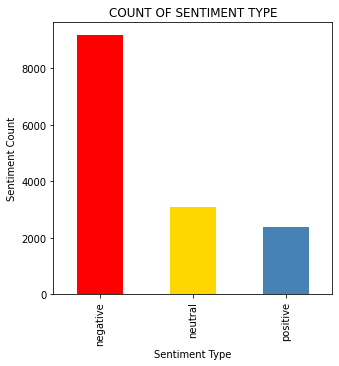

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [0]:
sent_count = df['airline_sentiment'].value_counts()
sent_count.plot(kind='bar', color=['red','gold','steelblue'],figsize=(5,5))
plt.xlabel('Sentiment Type')
plt.ylabel('Sentiment Count')
plt.title('COUNT OF SENTIMENT TYPE')
plt.show()


sent_count


* The number of negative reasons is more than that of positive and neutral reasons. 
>Negative reasons - 9178 ; Positive reasons - 2363 ; Neutral - 3099

Text(0.5, 1.0, 'Total Airline Review Count')

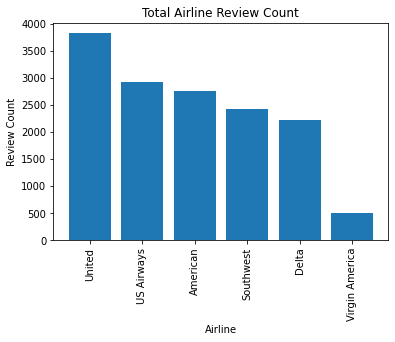

In [0]:
# The total no. of reviews of each airline is plotted

total_airline_reviews = df['airline'].value_counts()
index=[1,2,3,4,5,6]

plt.bar(index,total_airline_reviews)
plt.xticks(index,['United','US Airways','American','Southwest','Delta','Virgin America'],rotation=90)
plt.xlabel('Airline')
plt.ylabel('Review Count')
plt.title('Total Airline Review Count')

* The airline United has got more number of reviews.

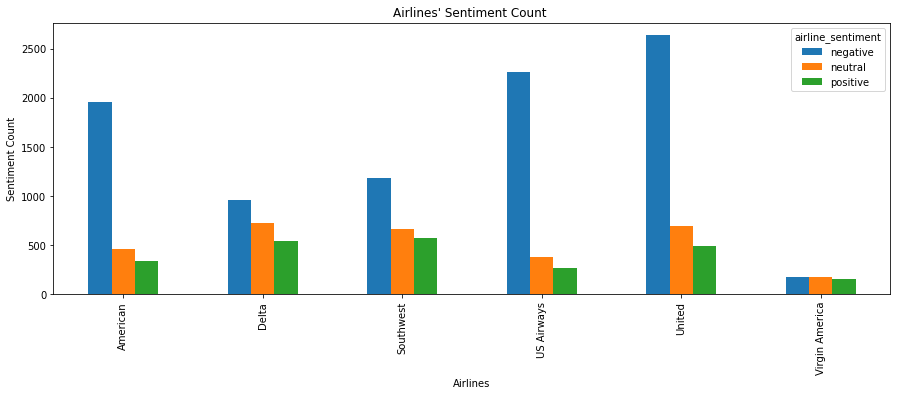

In [0]:
sent = df.groupby(['airline'])['airline_sentiment'].value_counts()
plot = sent.loc(axis=0)[:,:]
p = plot.groupby(['airline','airline_sentiment']).sum().unstack()
p.plot(kind='bar',figsize=(15,5))
plt.xlabel('Airlines')
plt.ylabel('Sentiment Count')
plt.title("Airlines' Sentiment Count ")
plt.show()

All the 3 sentiment counts are plotted against each airline
>*  United airlines has got more number of negative reviews compared to the other airlines.
>* US Airways and American airlines are the other two after United airlines with higher number of negative reviews.
>* The neutral and positive reviewes of all the airlines seem to be balanced evenly.

In [0]:
airlines = df['airline'].value_counts().sort_index()
airlines

American          2759
Delta             2222
Southwest         2420
US Airways        2913
United            3822
Virgin America     504
Name: airline, dtype: int64

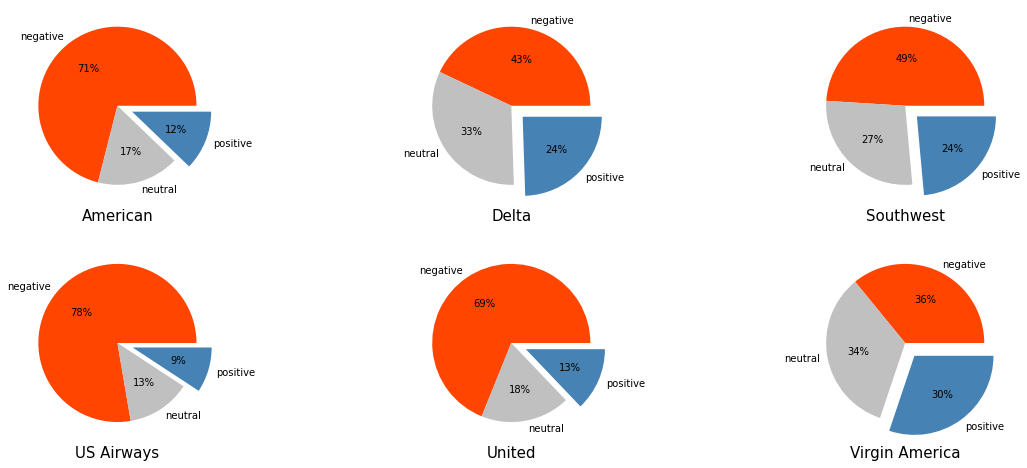

In [0]:
airlines = df.groupby(['airline'])['airline_sentiment'].value_counts()
q = airlines.groupby(['airline_sentiment','airline']).sum().unstack()
all_airlines = ['American','Delta','Southwest','US Airways','United','Virgin America']

labels = ['negative','neutral','positive']
colors = ['orangered','silver','steelblue']

fig = plt.figure(figsize=(20,8))

for i, airline in enumerate(all_airlines):
  plt.subplot(2,3,i+1)
  q[airline].plot.pie(labels=labels, colors=colors, autopct='%1.0f%%', explode = [0,0,0.2])
  plt.xlabel(airline, fontsize=15)
  plt.ylabel("",fontsize=20)
  

plt.show()

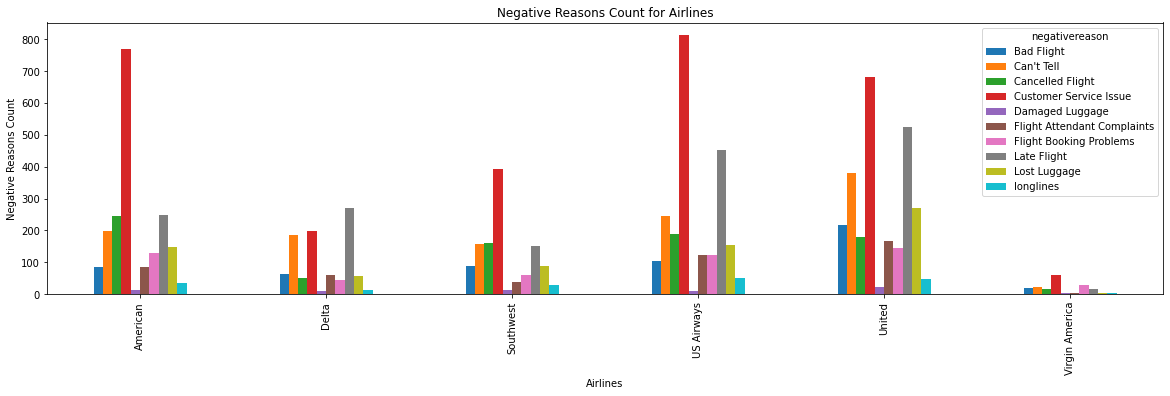

In [0]:
neg_reasons = df.groupby(['airline'])['negativereason'].value_counts()
plot = neg_reasons.loc(axis=0)[:,:]
p = plot.groupby(['airline','negativereason']).sum().unstack()
p.plot(kind='bar',figsize=(20,5))
plt.xlabel('Airlines')
plt.ylabel('Negative Reasons Count')
plt.title("Negative Reasons Count for Airlines")
plt.show()

* It is observed that the airlines American, US Airways and United have the highest negative reasons count for **Customer Service Issue**
* **Damaged luggage** seems to be the least popular negative reason for all the airlines.
* **Customer Service Issue** seems to be the most popular negative reason for all the airlines except for airline Delta

In [0]:
 nr_count = df['negativereason'].value_counts()
 nr_count

Customer Service Issue         2910
Late Flight                    1665
Can't Tell                     1190
Cancelled Flight                847
Lost Luggage                    724
Bad Flight                      580
Flight Booking Problems         529
Flight Attendant Complaints     481
longlines                       178
Damaged Luggage                  74
Name: negativereason, dtype: int64

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


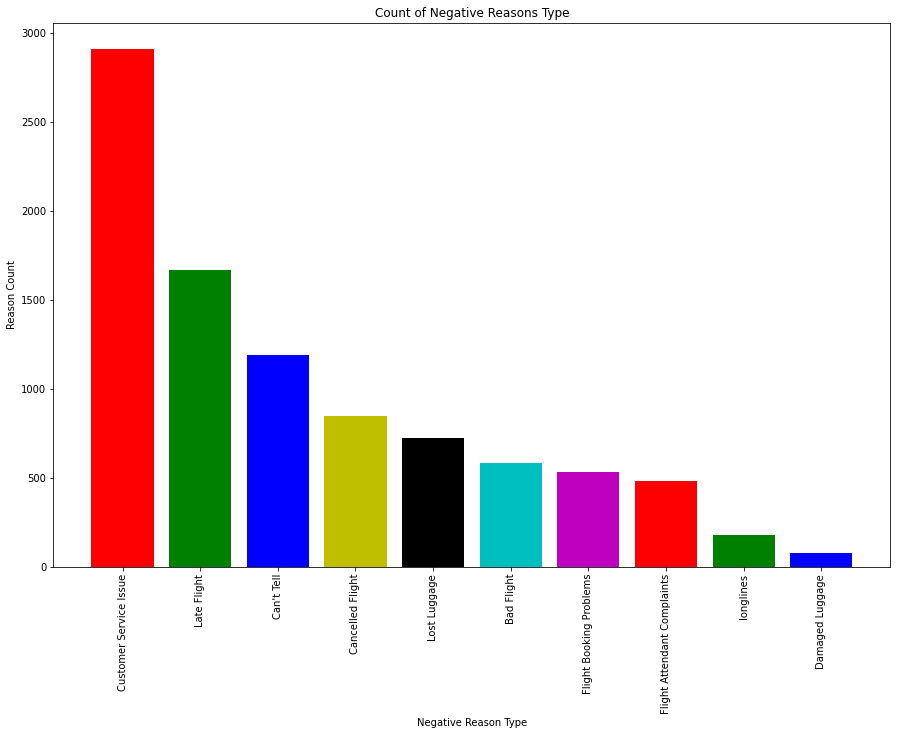

In [0]:
 nr = ['Customer Service Issue','Late Flight',"Can't Tell" , 'Cancelled Flight','Lost Luggage','Bad Flight','Flight Booking Problems',
       'Flight Attendant Complaints','longlines', 'Damaged Luggage']
index = list(range(10))
plt.figure(figsize=(15,10))
colors = 'rgbykcm'
plt.bar(index,nr_count,color=colors)
plt.xticks(index,nr,rotation=90)
plt.xlabel('Negative Reason Type')
plt.ylabel('Reason Count')
plt.title('Count of Negative Reasons Type')
plt.show()

* **Customer Service Issue** contributes the most to the negative reasons type followed by **Late Flight** .
* The least negative reason provided by the customers is **Damaged Luggage** .

Saving the pre-processed data onto my drive

In [0]:
df.to_csv('TwitterAirlineReviews.csv')
!cp TwitterAirlineReviews.csv "drive/My Drive/Twitter Airline Reviews Sentiment Dataset/"